## Load in the DEM

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist

In [4]:
src = rasterio.open("../toy_data/USGS13:-122.57_37.81_-122.45_37.87.tif")

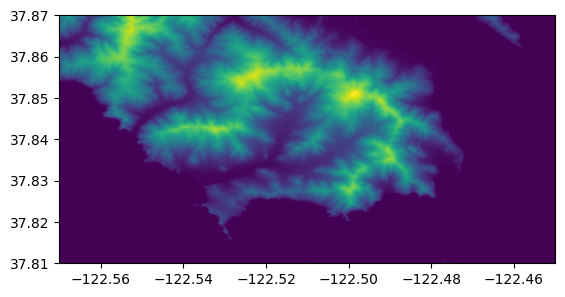

<AxesSubplot: >

In [7]:
show(src)

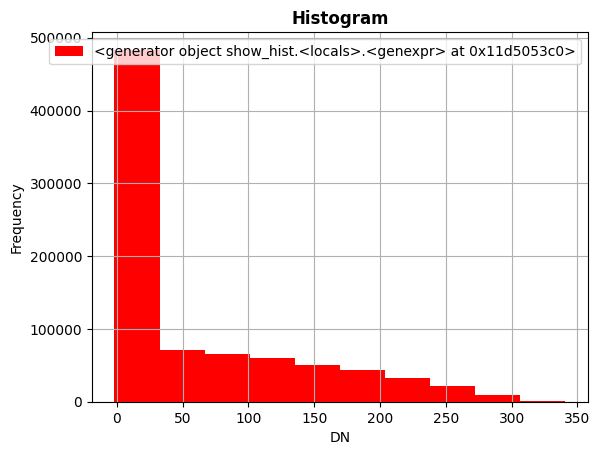

In [8]:
show_hist(src)

## Extract and plot a profile

In [9]:
src.crs

CRS.from_epsg(4269)

In [10]:
src.statistics(1)

Statistics(min=-1.8328540325165, max=340.83868408203, mean=57.627441285322, std=79.365977783306)

In [11]:
src.index

<bound method TransformMethodsMixin.index of <open DatasetReader name='../toy_data/USGS13:-122.57_37.81_-122.45_37.87.tif' mode='r'>>

In [12]:
src.files

['../toy_data/USGS13:-122.57_37.81_-122.45_37.87.tif',
 '../toy_data/USGS13:-122.57_37.81_-122.45_37.87.tif.aux.xml']

In [13]:
row,col = src.index(-122.53, 37.85)

In [14]:
row

215

In [15]:
col

431

start with just a row, later will do a line between any arbitrary two points

In [16]:
dem = src.read(1)

In [17]:
dem.shape

(648, 1296)

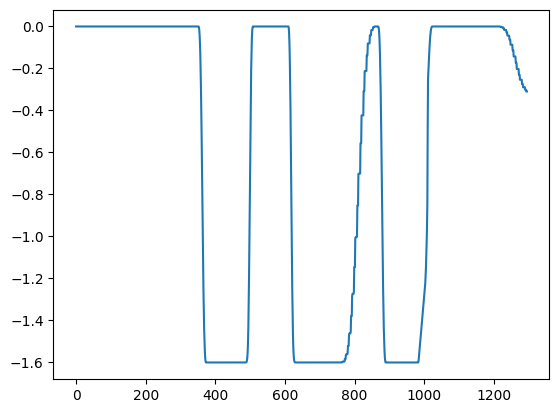

In [18]:
plt.plot(dem[600,:])

plot a line over the original raster for that row

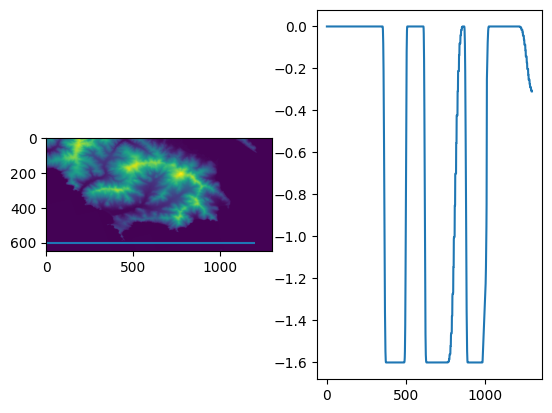

In [19]:
fig,axs = plt.subplots(1,2)
show(dem, ax=axs[0])
axs[0].hlines(600,0,1200)
axs[1] = plt.plot(dem[600,:])
plt.show()

In [20]:
def get_values(arr, p1, p2):
    minx = min(p1[0], p2[0])
    maxx = max(p1[0], p2[0])
    x_values = np.arange(minx, maxx+1)
    y_values = np.interp(x_values, [p1[0], p2[0]], [p1[1], p2[1]])
    y_values = np.around(y_values).astype(int)
    heights = arr[y_values, x_values]
    return heights, x_values, y_values

NameError: name 'p1' is not defined

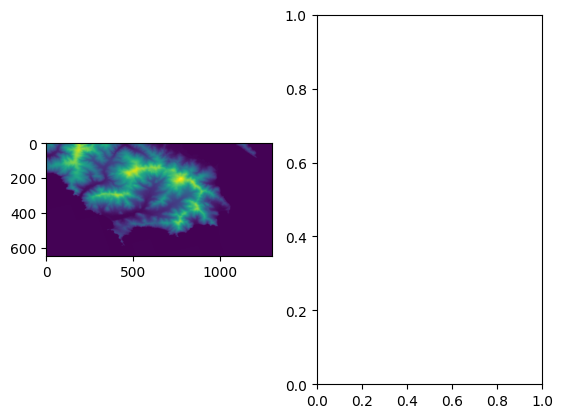

In [21]:
p1 = ()
p2 -=
fig,axs = plt.subplots(1,2)
show(dem, ax=axs[0])
axs[0].axline(p1, p2)
axs[1] = plt.plot(heights)
plt.show()